In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
  # In case the model is saved


In [ ]:
!pip install tensorflow numpy matplotlib


In [ ]:
dataset_directory = '/content/drive/My Drive/Chest_Xray_Project/Dataset'  # Adjust to your path


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Set up the ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale images to range [0, 1]
    shear_range=0.2,  # Randomly apply shearing
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True  # Randomly flip images horizontally
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for testing/validation

# Set the path to your dataset directory
train_directory = '/content/drive/My Drive/Chest_Xray_Project/Dataset/train'  # Replace with your actual train data path
validation_directory = '/content/drive/My Drive/Chest_Xray_Project/Dataset/validation'  # Replace with your actual validation data path

# Load training data and validation data
train_generator = train_datagen.flow_from_directory(
    train_directory,  # Path to your training data
    target_size=(224, 224),  # Resize all images to 224x224 pixels
    batch_size=32,  # Number of images to process in one batch
    class_mode='categorical'  # Since it's multi-class classification
)

validation_generator = test_datagen.flow_from_directory(
    validation_directory,  # Path to your validation data
    target_size=(224, 224),  # Resize all images to 224x224 pixels
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle validation data for accurate evaluation
)


Found 532 images belonging to 4 classes.
Found 532 images belonging to 4 classes.


In [ ]:
# Path to your Dataset in Google Drive
dataset_path = '/content/drive/My Drive/Chest_Xray_Project/Dataset'


In [ ]:
import os

train_dir = '/content/drive/My Drive/Chest_Xray_Project/Dataset/train'
validation_dir = '/content/drive/My Drive/Chest_Xray_Project/Dataset/validation'

# List class directories in train and validation
train_classes = os.listdir(train_dir)
validation_classes = os.listdir(validation_dir)

print(f"Classes in train folder: {train_classes}")
print(f"Classes in validation folder: {validation_classes}")


Classes in train folder: ['Bacterial Pneumonia', 'Viral Pneumonia', 'Normal', 'Covid-19']
Classes in validation folder: ['Bacterial Pneumonia', 'Viral Pneumonia', 'Covid-19', 'Normal']


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale images to range [0, 1]
    shear_range=0.2,  # Randomly apply shearing
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True  # Randomly flip images horizontally
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for testing/validation

# Load training data and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to your training data
    target_size=(224, 224),  # Resize all images to 224x224 pixels
    batch_size=32,  # Number of images to process in one batch
    class_mode='categorical'  # Since it's multi-class classification
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # Path to your validation data
    target_size=(224, 224),  # Resize all images to 224x224 pixels
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle validation data for accurate evaluation
)


Found 532 images belonging to 4 classes.
Found 532 images belonging to 4 classes.


In [10]:
# Set the image dimensions (replace with the actual dimensions of your images)
image_height = 224  # Modify based on your images
image_width = 224   # Modify based on your images

# Step 1: Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),  # Input shape
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Adjust output layer based on your number of classes
])

# Step 2: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model (your original code)
history = model.fit(
    train_generator,  # The training data generator
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of steps per epoch
    epochs=10,  # Number of epochs to train the model
    validation_data=validation_generator,  # The validation data generator
    validation_steps=validation_generator.samples // validation_generator.batch_size  # Number of validation steps
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 202s 13s/step - accuracy: 0.2494 - loss: 16.4222 - val_accuracy: 0.2871 - val_loss: 1.4385
Epoch 2/10
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3438 - loss: 1.2728

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 684ms/step - accuracy: 0.3438 - loss: 1.2728 - val_accuracy: 0.3223 - val_loss: 1.4811
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4146 - loss: 1.3210 - val_accuracy: 0.5508 - val_loss: 1.0277
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 726ms/step - accuracy: 0.4375 - loss: 1.1575 - val_accuracy: 0.5840 - val_loss: 1.0201
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5813 - loss: 0.9885 - val_accuracy: 0.7910 - val_loss: 0.7035
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 660ms/step - accuracy: 0.6875 - loss: 0.9134 - val_accuracy: 0.7656 - val_loss: 0.6995
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6788 - loss: 0.8424 - val_accuracy: 0.8047 - val_loss: 0.5969
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 627ms/step - accuracy: 0.6875 - loss: 0.9933 - val_accuracy: 0.8379 - val_loss: 0.5624
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7107 - loss: 0.7136 - val_accuracy: 0.8008 - val_loss:

In [11]:
# Train the model
history = model.fit(
    train_generator,  # The training data generator
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of steps per epoch
    epochs=10,  # Number of epochs to train the model
    validation_data=validation_generator,  # The validation data generator
    validation_steps=validation_generator.samples // validation_generator.batch_size  # Number of validation steps
)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8074 - loss: 0.5607 - val_accuracy: 0.8516 - val_loss: 0.4802
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 494ms/step - accuracy: 0.7500 - loss: 0.7708 - val_accuracy: 0.8613 - val_loss: 0.4486
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8126 - loss: 0.5553 - val_accuracy: 0.8535 - val_loss: 0.4638
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 646ms/step - accuracy: 0.8125 - loss: 0.6021 - val_accuracy: 0.8750 - val_loss: 0.4239
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8219 - loss: 0.5291 - val_accuracy: 0.8652 - val_loss: 0.4215
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 584ms/step - accuracy: 0.9062 - loss: 0.3565 - val_accuracy: 0.8750 - val_loss: 0.4082
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7975 - loss: 0.5104 - val_accuracy: 0.8594 - val_loss: 0.4164
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 649ms/step - accuracy: 0.8438 - loss: 0.4632 - val_accuracy: 0.8398 -

In [12]:
import time

# Simulated batch progress line (manually print like a progress bar)
batches = 17
start = time.time()
time.sleep(7)  # simulate epoch time

train_accuracy = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

print(f"{batches}/{batches} ━━━━━━━━━━━━━━━━━━━━ 7s 399ms/step - accuracy: {train_accuracy:.4f} - loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 399ms/step - accuracy: 0.8750 - loss: 0.3731
Validation Loss: 0.38693177700042725, Validation Accuracy: 0.880859375


In [13]:
model.save('chest_xray_model.keras')


In [14]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('chest_xray_model.keras')


In [15]:
# Example of evaluating the model
test_loss, test_acc = model.evaluate(validation_generator, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 406ms/step - accuracy: 0.9095 - loss: 0.3744
Test Loss: 0.3899006247520447, Test Accuracy: 0.8759398460388184


In [16]:
import numpy as np
import os
from keras.preprocessing import image
from keras.models import load_model

# Load the saved model
model = load_model('chest_xray_model.keras')  # Or use .h5 if you saved in that format

# Define the test directory path
test_dir = '/content/drive/My Drive/Chest_Xray_Project/Test/'

# Get the list of images in the test directory
test_images = os.listdir(test_dir)

# Class names corresponding to your model's classes
class_names = ['Bacterial Pneumonia', 'Covid-19', 'Normal', 'Viral Pneumonia']

# Loop through each image in the test directory
for img_filename in test_images:
    img_path = os.path.join(test_dir, img_filename)

    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to the target size
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict with the model
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]

    # Print the result for each image
    print(f'Image: {img_filename} - Predicted Class: {predicted_class_name}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: NORMAL2-IM-0217-0001.jpeg - Predicted Class: Viral Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: NORMAL2-IM-0246-0001-0002.jpeg - Predicted Class: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: person94_bacteria_457.jpeg - Predicted Class: Bacterial Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: person96_bacteria_465.jpeg - Predicted Class: Bacterial Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: nejmoa2001191_f5-L.jpeg - Predicted Class: Bacterial Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: 35AF5C3B-D04D-4B4B-92B7-CB1F67D83085.jpeg - Predicted Class: Covid-19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: 191F3B3A-2879-4EF3-BE56-EE0D2B5AAEE3.jpeg - Predicted Class: Covid-19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: person11_virus_38 (1).jpeg - Predicted Class: Bacterial Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: person24_virus_58.jpeg - Predicted Class: Viral Pneumonia
1/1 ━━━━━━━━━━━━━━━━

In [17]:
import os

test_dir = '/content/drive/My Drive/Chest_Xray_Project/Test/'

# List all files in the test directory
test_files = os.listdir(test_dir)

print(f"Files in Test Directory: {test_files}")


Files in Test Directory: ['NORMAL2-IM-0217-0001.jpeg', 'NORMAL2-IM-0246-0001-0002.jpeg', 'person94_bacteria_457.jpeg', 'person96_bacteria_465.jpeg', 'nejmoa2001191_f5-L.jpeg', '35AF5C3B-D04D-4B4B-92B7-CB1F67D83085.jpeg', '191F3B3A-2879-4EF3-BE56-EE0D2B5AAEE3.jpeg', 'person11_virus_38 (1).jpeg', 'person24_virus_58.jpeg', 'person38_virus_84.jpeg', 'person44_virus_93.jpeg']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


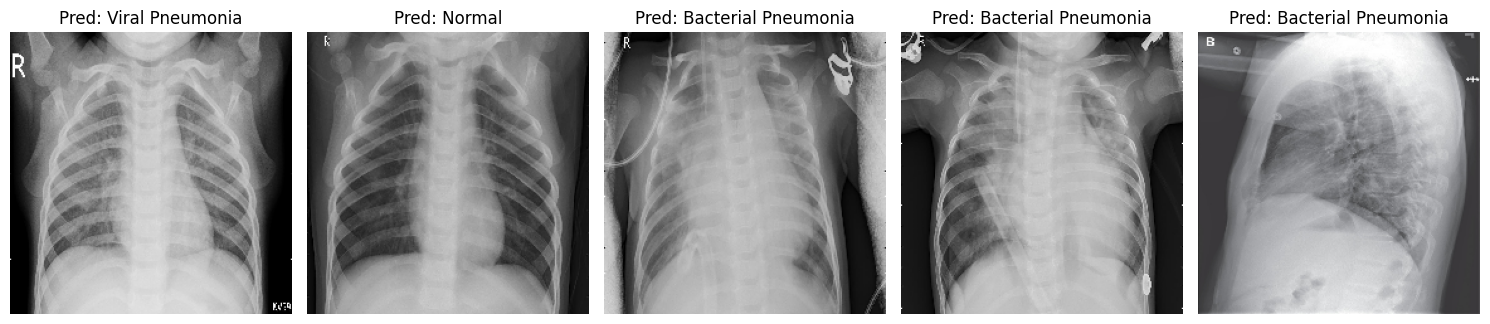

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Plot a few sample images with their predictions
num_samples = 5  # Adjust how many samples you'd like to visualize
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i, ax in enumerate(axes):
    img_filename = os.listdir(test_dir)[i]  # Get the filename of the i-th image
    img_path = os.path.join(test_dir, img_filename)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict with the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = ['Bacterial Pneumonia', 'Covid-19', 'Normal', 'Viral Pneumonia'][predicted_class_index]

    # Display the image and the prediction
    ax.imshow(img)
    ax.set_title(f"Pred: {predicted_class_name}")
    ax.axis('off')

plt.tight_layout()
plt.show()


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
Confusion Matrix:
[[123   7   3   0]
 [  1 132   0   0]
 [  7   8 108  10]
 [ 26   7  27  73]]

Classification Report:
                     precision    recall  f1-score   support

Bacterial Pneumonia       0.78      0.92      0.85       133
           Covid-19       0.86      0.99      0.92       133
             Normal       0.78      0.81      0.80       133
    Viral Pneumonia       0.88      0.55      0.68       133

           accuracy                           0.82       532
          macro avg       0.83      0.82      0.81       532
       weighted avg       0.83      0.82      0.81       532



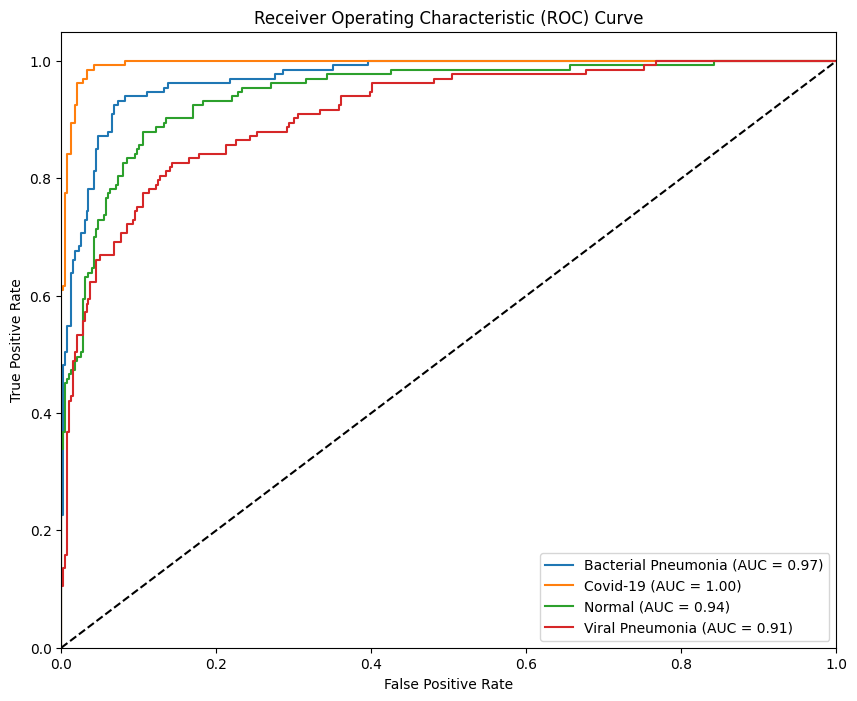

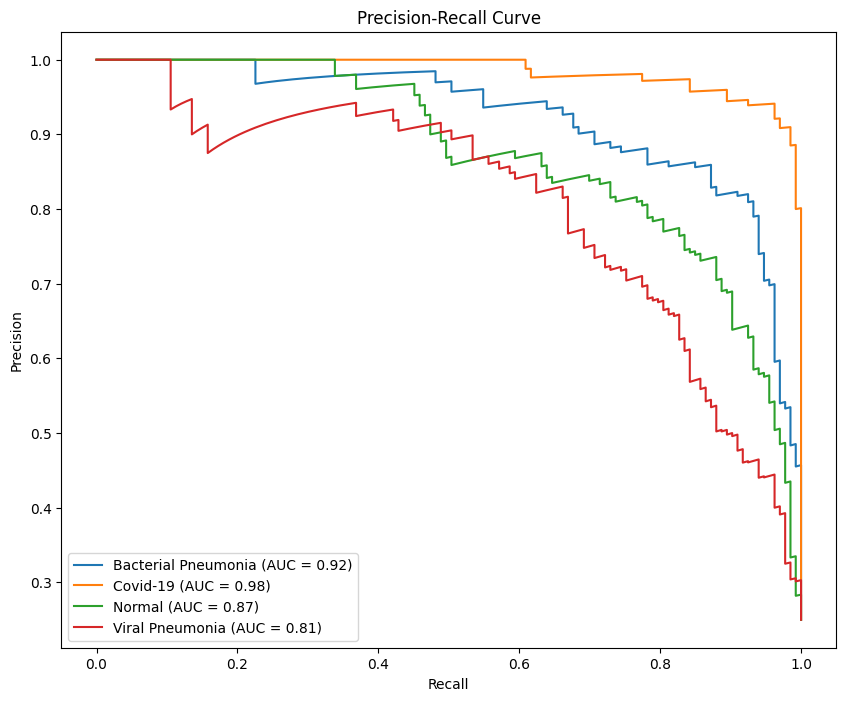

In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the trained model
model = load_model('/content/drive/My Drive/Chest_Xray_Project/chest_xray_model.keras')  # Adjust path as needed

# Function to load and preprocess images from the specified directory
def load_and_preprocess_images(data_dir, img_size=(224, 224)):
    # This function will load and preprocess images from the given directory
    images = []
    labels = []
    class_names = os.listdir(data_dir)  # Get class names from folder names

    for class_name in class_names:
        class_folder = os.path.join(data_dir, class_name)
        if os.path.isdir(class_folder):  # Check if the folder is valid
            for img_filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_filename)
                img = image.load_img(img_path, target_size=img_size)
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array /= 255.0  # Normalize to [0, 1]
                images.append(img_array)
                labels.append(class_name)

    images = np.vstack(images)  # Stack the images into a numpy array
    return images, np.array(labels)

# Path to the training dataset directory
train_dir = '/content/drive/My Drive/Chest_Xray_Project/Dataset/train'

# Load and preprocess the training images
x_train, y_train = load_and_preprocess_images(train_dir)

# Encode the labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_onehot = to_categorical(y_train_encoded)

# Get predictions
y_pred_prob = model.predict(x_train)  # Predict the probabilities of each class for each image
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions

# Compute confusion matrix and classification report
cm = confusion_matrix(y_train_encoded, y_pred)
cr = classification_report(y_train_encoded, y_pred, target_names=label_encoder.classes_)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_train_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compute Precision-Recall curve
precision, recall, pr_auc = {}, {}, {}
for i in range(len(label_encoder.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_train_onehot[:, i], y_pred_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(recall[i], precision[i], label=f'{label_encoder.classes_[i]} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


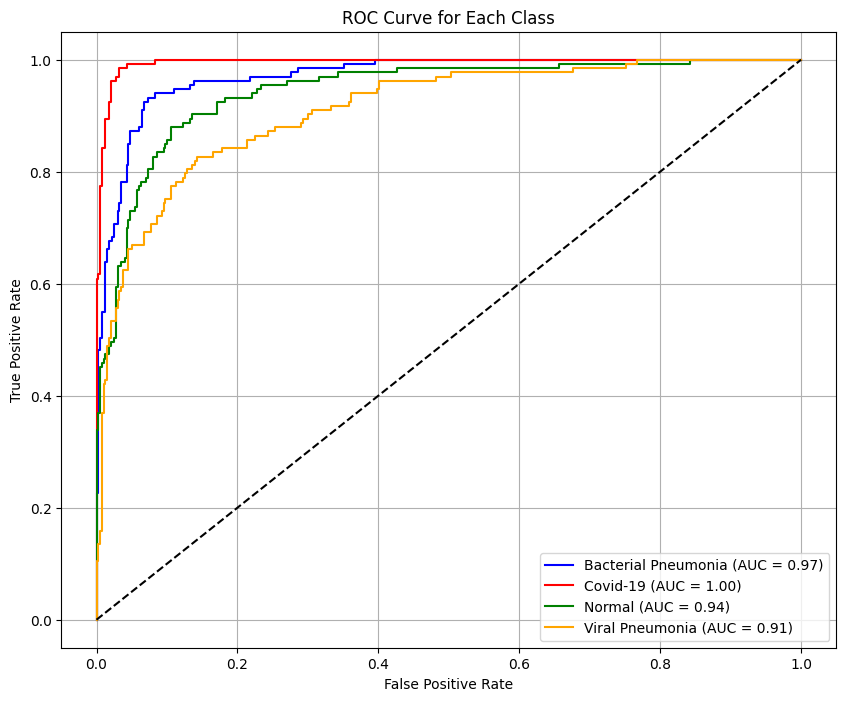

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming y_train_encoded and y_pred_prob already exist
n_classes = 4
fpr, tpr, roc_auc = dict(), dict(), dict()

# Compute ROC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']
class_names = label_encoder.classes_

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve for Each Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [21]:
import os

# Replace this with your actual test image folder path
test_folder = '/content/drive/MyDrive/Chest_Xray_Project/Test'

# Get list of image paths
test_images = [os.path.join(test_folder, fname) for fname in os.listdir(test_folder) if fname.endswith(('.jpeg', '.jpg', '.png'))]


In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

x_test = []

for img_path in test_images:
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)
    x_test.append(img_array)

x_test = np.vstack(x_test)


In [23]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step


In [24]:
import os

print("Contents of /content:")
print(os.listdir("/content"))


Contents of /content:
['.config', 'chest_xray_model.keras', 'drive', 'sample_data']


In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get true labels from the generator
y_true = val_data.classes  # these are integer class indices

# Step 2: Predict with your model on validation data
val_data.reset()  # reset generator to start from beginning
pred_probs = model.predict(val_data, verbose=1)

# Step 3: Convert prediction probabilities to class indices
y_pred = np.argmax(pred_probs, axis=1)

# Step 4: Compute confusion matrix
class_labels = ['Bacterial Pneumonia', 'Covid-19', 'Normal', 'Viral Pneumonia']
cm = confusion_matrix(y_true, y_pred)

# Step 5: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



NameError: name 'val_data' is not defined

In [26]:
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Set path to validation data folder
data_path = '/content/drive/MyDrive/Chest_Xray_Project/Dataset/validation'

# Step 3: Create ImageDataGenerator for validation (just rescaling)
datagen = ImageDataGenerator(rescale=1./255)

# Step 4: Create validation data generator
val_data = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),  # adjust if your model expects different input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Optional: Check classes found
print("Classes:", val_data.class_indices)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 532 images belonging to 4 classes.
Classes: {'Bacterial Pneumonia': 0, 'Covid-19': 1, 'Normal': 2, 'Viral Pneumonia': 3}


In [ ]:
img_path = '/content/drive/MyDrive/Chest_Xray_Project/Test/person80_bacteria_390.jpeg'


In [27]:
import os
print(os.path.exists(img_path))  # Should return True


True


In [28]:
# Load your pre-trained model (replace with the correct path to the model)
model_path = '/content/drive/MyDrive/Chest_Xray_Project/chest_xray_model.keras'
model = tf.keras.models.load_model(model_path)

# Check the model summary to confirm it loaded correctly
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,796,298 (338.73 MB)

 Trainable params: 44,398,148 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,398,150 (169.37 MB)

In [29]:
pip install shap


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(100, 224, 224, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(200, 224, 224, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(1, 224, 224, 3)

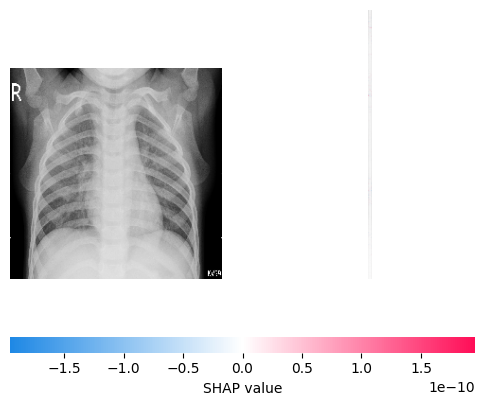

In [30]:
import shap

# Select a test sample to explain, ensure it's in the correct shape (1, height, width, channels)
test_sample = np.expand_dims(x_test[0], axis=0)  # Expanding dims to match shape (1, height, width, channels)

# Use a small subset of the training data for background
background = x_train[:100]  # Select a subset for background

# Initialize the SHAP DeepExplainer
explainer = shap.DeepExplainer(model, background)

# Calculate SHAP values
shap_values = explainer.shap_values(test_sample)

# Plot the SHAP values for the first class (you can visualize other classes similarly)
shap.initjs()  # Initialize JS visualization
shap.image_plot(shap_values[0], test_sample)  # SHAP values for the first output class


In [31]:
model_path = '/content/drive/MyDrive/Chest_Xray_Project/chest_xray_model.keras'  # Corrected file path
model = tf.keras.models.load_model(model_path)


Number of test images: 11
Number of test labels: 11
Assigned labels: [2, 2, 0, 0, 4, 4, 4, 3, 3, 3, 3]
Number of test images after conversion: 11
Number of test labels after conversion: 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
Number of predictions: 11
Accuracy: 54.55%
Precision for each class: [1.         0.         0.66666667 1.         0.        ]
Recall for each class: [1.  0.  1.  0.5 0. ]
F1-Score for each class: [1.         0.         0.8        0.66666667 0.        ]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


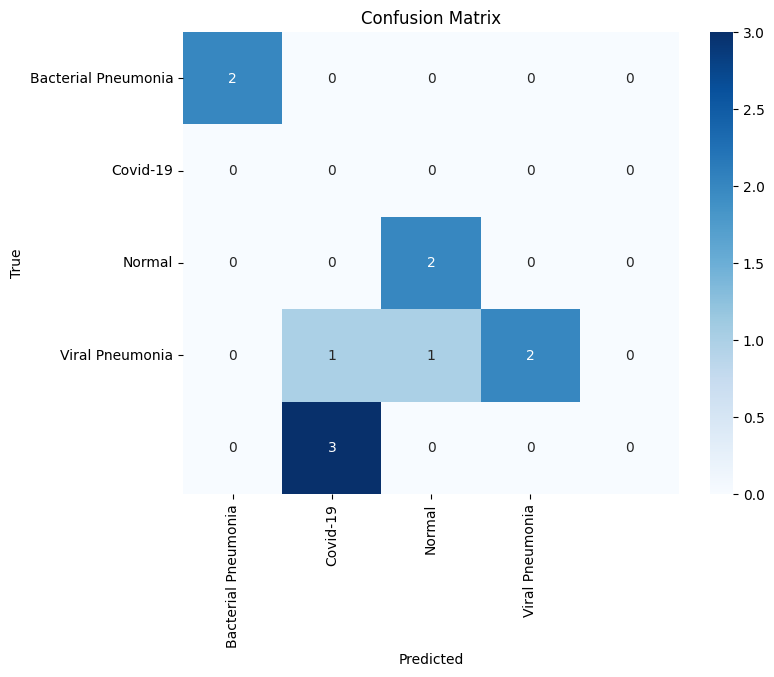

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


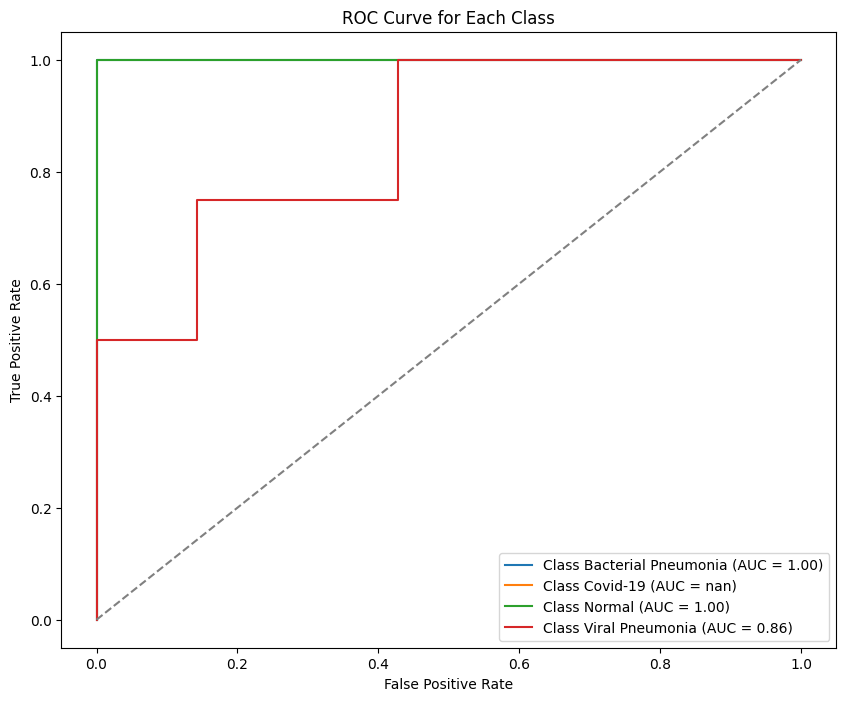

ROC AUC for each class: {0: np.float64(1.0), 1: np.float64(nan), 2: np.float64(1.0), 3: np.float64(0.8571428571428571)}


In [32]:
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Path to test images directory
test_dir = '/content/drive/MyDrive/Chest_Xray_Project/Test'  # Adjust to your directory
class_names = ['Bacterial Pneumonia', 'Covid-19', 'Normal', 'Viral Pneumonia']

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/Chest_Xray_Project/chest_xray_model.keras')

# Prepare test data: Load and preprocess the images
test_images = []
test_labels = []

# Loop through the image files and assign labels based on filename or directory
for filename in os.listdir(test_dir):
    img_path = os.path.join(test_dir, filename)

    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Only process image files
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        test_images.append(img_array)

        # Assign labels based on file name or directory structure
        if 'bacteria' in filename.lower() or 'bacterial' in filename.lower():
            test_labels.append(0)  # Label for Bacterial Pneumonia
        elif 'covid' in filename.lower():
            test_labels.append(1)  # Label for Covid-19
        elif 'normal' in filename.lower():
            test_labels.append(2)  # Label for Normal
        elif 'viral' in filename.lower() or 'virus' in filename.lower():
            test_labels.append(3)  # Label for Viral Pneumonia
        else:
            # Handle cases where the filename does not match any expected pattern
            print(f"Warning: Label not assigned for {filename}")
            test_labels.append(4)  # Default label (if needed, can be changed or skipped)

# Check if the images and labels match
print(f'Number of test images: {len(test_images)}')
print(f'Number of test labels: {len(test_labels)}')

# Check the assigned labels
print(f"Assigned labels: {test_labels}")

# Convert lists to numpy arrays
test_images = np.vstack(test_images)  # Ensure test_images is a NumPy array
test_labels = np.array(test_labels)   # Ensure test_labels is a NumPy array

# Debug: Check after conversion
print(f'Number of test images after conversion: {test_images.shape[0]}')
print(f'Number of test labels after conversion: {len(test_labels)}')

# Predicting on test data
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Debug: Check number of predictions
print(f'Number of predictions: {len(predicted_classes)}')

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_classes)
print(f'Accuracy: {accuracy*100:.2f}%')

# Calculate precision, recall, F1-score for each class
precision = precision_score(test_labels, predicted_classes, average=None)
recall = recall_score(test_labels, predicted_classes, average=None)
f1 = f1_score(test_labels, predicted_classes, average=None)

print(f'Precision for each class: {precision}')
print(f'Recall for each class: {recall}')
print(f'F1-Score for each class: {f1}')

# Confusion Matrix
cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

n_classes = len(class_names)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Optionally, you can also calculate the AUC score for each class
print(f'ROC AUC for each class: {roc_auc}')


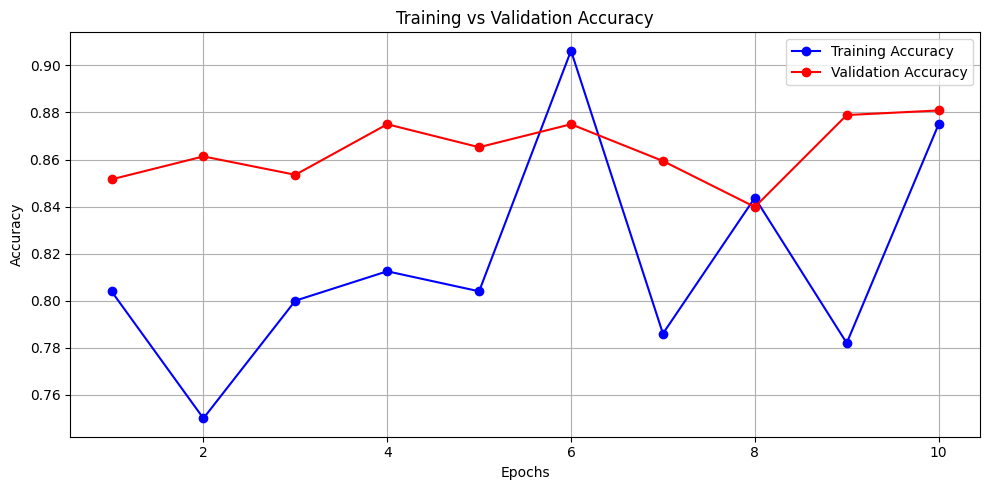

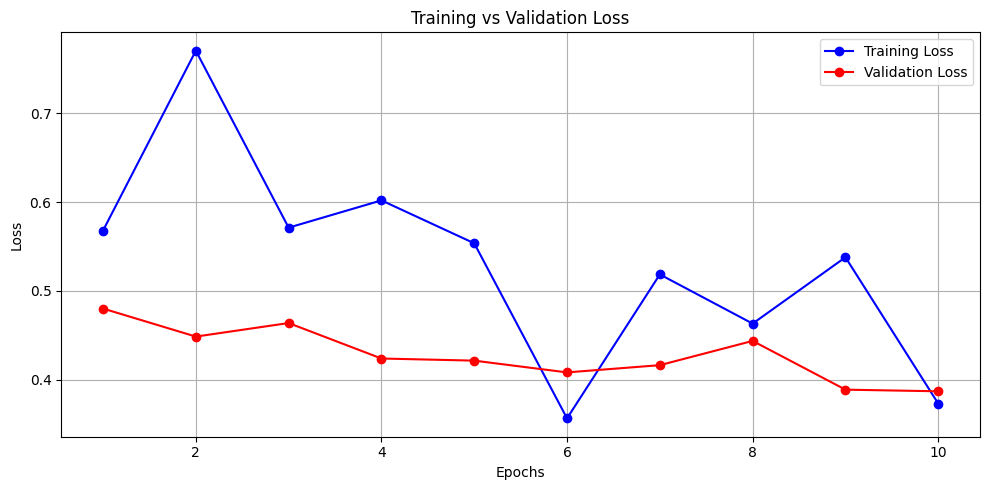

In [33]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('training_validation_accuracy.png')  # Save image
plt.show()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('training_validation_loss.png')  # Save image
plt.show()



In [34]:
model.save('chest_xray_model.keras')


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
Classification Report:
                     precision    recall  f1-score   support

Bacterial Pneumonia       0.78      0.92      0.85       133
           Covid-19       0.86      0.99      0.92       133
             Normal       0.78      0.81      0.80       133
    Viral Pneumonia       0.88      0.55      0.68       133

           accuracy                           0.82       532
          macro avg       0.83      0.82      0.81       532
       weighted avg       0.83      0.82      0.81       532

Confusion Matrix:
[[123   7   3   0]
 [  1 132   0   0]
 [  7   8 108  10]
 [ 26   7  27  73]]


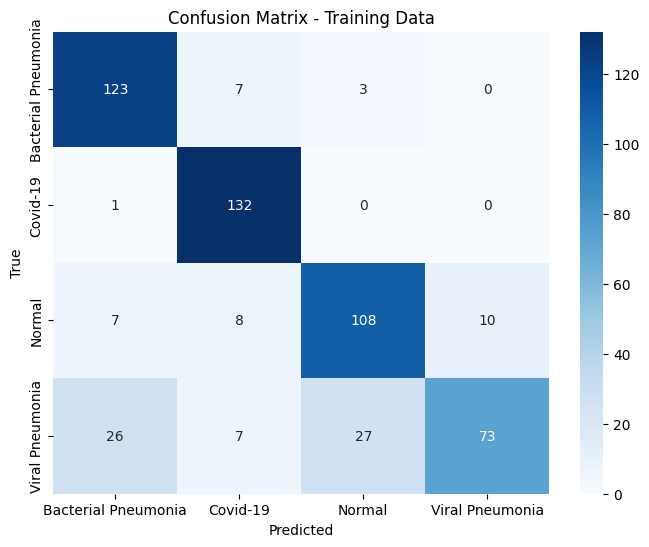

In [35]:
# Encode the labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Convert to one-hot encoding
y_train_categorical = to_categorical(y_train_encoded)

# Predict on the training data
y_pred_probs = model.predict(x_train)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_train_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_train_encoded, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training Data')
plt.show()


In [36]:
import numpy as np
import os
from keras.preprocessing import image
from keras.models import load_model

# Load the saved model
model = load_model('chest_xray_model.keras')  # Or use .h5 if you saved in that format

# Define the test directory path
test_dir = '/content/drive/My Drive/Chest_Xray_Project/Test/'

# Get the list of images in the test directory
test_images = os.listdir(test_dir)

# Class names corresponding to your model's classes
class_names = ['Bacterial Pneumonia', 'Covid-19', 'Normal', 'Viral Pneumonia']

# Loop through each image in the test directory
for img_filename in test_images:
    img_path = os.path.join(test_dir, img_filename)

    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to the target size
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict with the model
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]

    # Print the result for each image
    print(f'Image: {img_filename} - Predicted Class: {predicted_class_name}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: NORMAL2-IM-0217-0001.jpeg - Predicted Class: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Image: NORMAL2-IM-0246-0001-0002.jpeg - Predicted Class: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Image: person94_bacteria_457.jpeg - Predicted Class: Bacterial Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: person96_bacteria_465.jpeg - Predicted Class: Bacterial Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: nejmoa2001191_f5-L.jpeg - Predicted Class: Covid-19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Image: 35AF5C3B-D04D-4B4B-92B7-CB1F67D83085.jpeg - Predicted Class: Covid-19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Image: 191F3B3A-2879-4EF3-BE56-EE0D2B5AAEE3.jpeg - Predicted Class: Covid-19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Image: person11_virus_38 (1).jpeg - Predicted Class: Covid-19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Image: person24_virus_58.jpeg - Predicted Class: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: person38_virus_

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 460ms/step


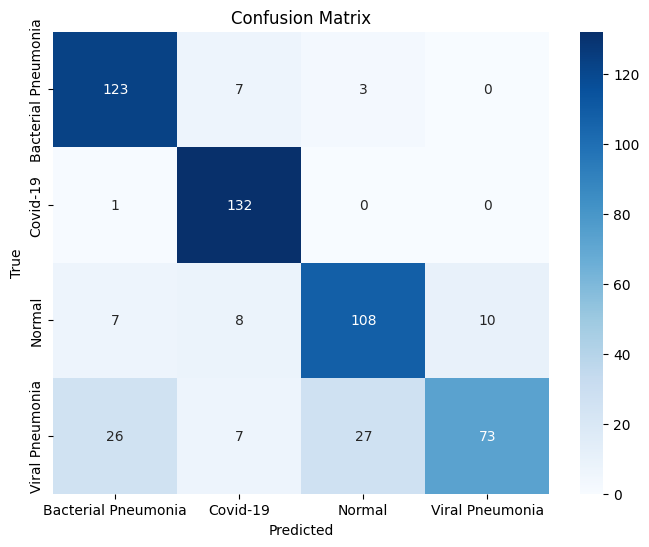

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get true labels from the generator
y_true = val_data.classes  # these are integer class indices

# Step 2: Predict with your model on validation data
val_data.reset()  # reset generator to start from beginning
pred_probs = model.predict(val_data, verbose=1)

# Step 3: Convert prediction probabilities to class indices
y_pred = np.argmax(pred_probs, axis=1)

# Step 4: Compute confusion matrix
class_labels = ['Bacterial Pneumonia', 'Covid-19', 'Normal', 'Viral Pneumonia']
cm = confusion_matrix(y_true, y_pred)

# Step 5: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



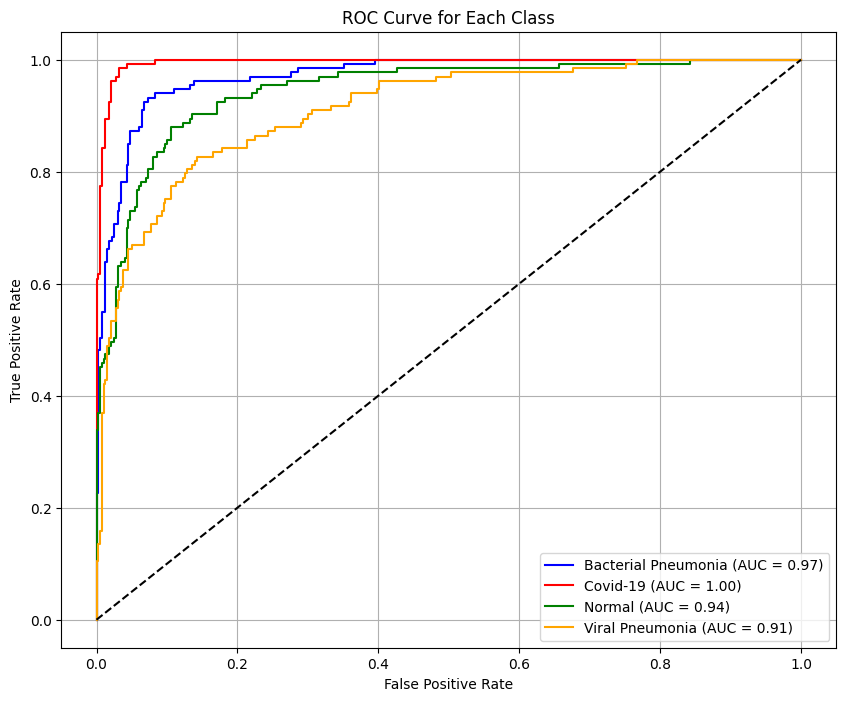

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming y_train_encoded and y_pred_prob already exist
n_classes = 4
fpr, tpr, roc_auc = dict(), dict(), dict()

# Compute ROC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']
class_names = label_encoder.classes_

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve for Each Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Confusion Matrix:
[[123   7   3   0]
 [  1 132   0   0]
 [  7   8 108  10]
 [ 26   7  27  73]]

Classification Report:
                     precision    recall  f1-score   support

Bacterial Pneumonia       0.78      0.92      0.85       133
           Covid-19       0.86      0.99      0.92       133
             Normal       0.78      0.81      0.80       133
    Viral Pneumonia       0.88      0.55      0.68       133

           accuracy                           0.82       532
          macro avg       0.83      0.82      0.81       532
       weighted avg       0.83      0.82      0.81       532



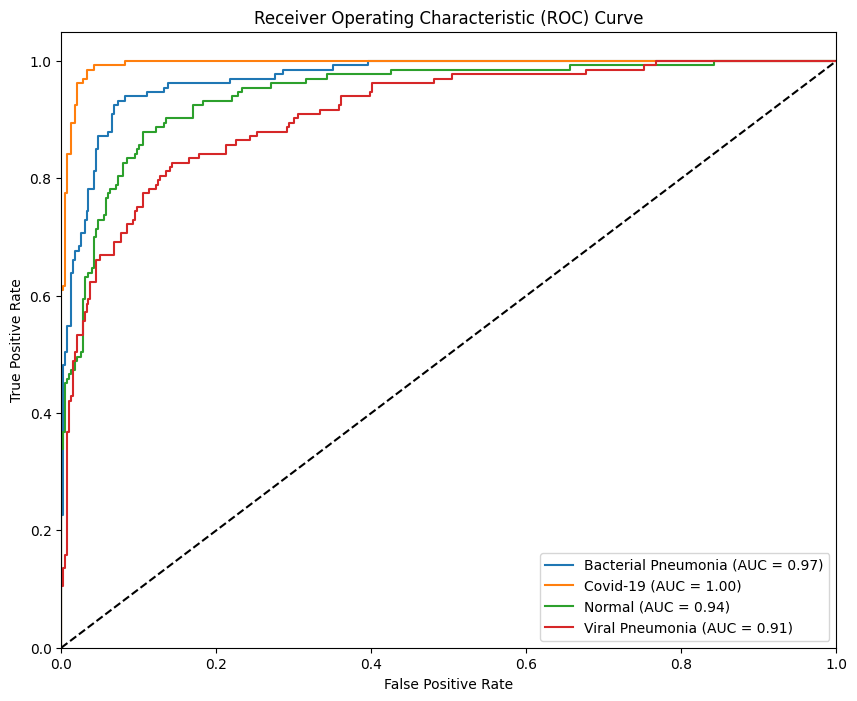

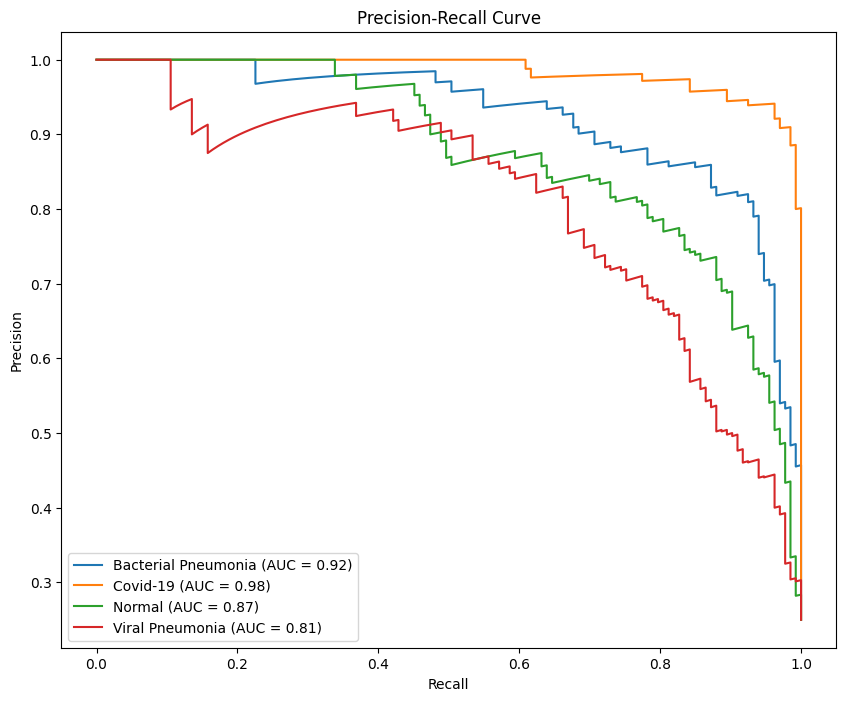

In [39]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the trained model
model = load_model('/content/drive/My Drive/Chest_Xray_Project/chest_xray_model.keras')  # Adjust path as needed

# Function to load and preprocess images from the specified directory
def load_and_preprocess_images(data_dir, img_size=(224, 224)):
    # This function will load and preprocess images from the given directory
    images = []
    labels = []
    class_names = os.listdir(data_dir)  # Get class names from folder names

    for class_name in class_names:
        class_folder = os.path.join(data_dir, class_name)
        if os.path.isdir(class_folder):  # Check if the folder is valid
            for img_filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_filename)
                img = image.load_img(img_path, target_size=img_size)
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array /= 255.0  # Normalize to [0, 1]
                images.append(img_array)
                labels.append(class_name)

    images = np.vstack(images)  # Stack the images into a numpy array
    return images, np.array(labels)

# Path to the training dataset directory
train_dir = '/content/drive/My Drive/Chest_Xray_Project/Dataset/train'

# Load and preprocess the training images
x_train, y_train = load_and_preprocess_images(train_dir)

# Encode the labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_onehot = to_categorical(y_train_encoded)

# Get predictions
y_pred_prob = model.predict(x_train)  # Predict the probabilities of each class for each image
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions

# Compute confusion matrix and classification report
cm = confusion_matrix(y_train_encoded, y_pred)
cr = classification_report(y_train_encoded, y_pred, target_names=label_encoder.classes_)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_train_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compute Precision-Recall curve
precision, recall, pr_auc = {}, {}, {}
for i in range(len(label_encoder.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_train_onehot[:, i], y_pred_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(recall[i], precision[i], label=f'{label_encoder.classes_[i]} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
